# ***Implementation of SARSA Algorithm using a 5x5 grid environment***
#### This file consists of code that we used for the tutorial
#### GitHub Repository containing all the code and plots : https://github.com/SaiTejaBorgam/On-Policy-Reinforcement-Learning-SARSA
#### SARSA Implementation and Effect of Learning rate and Discount Factor on SARSA

In [14]:
import numpy as np
import random

# Parameters required for SARSA algorithm

alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 0.1  # Exploration rate
num_episodes = 1000 # Number of episodes
grid_size = 5  # Size of the grid

actions = ['up', 'down', 'left', 'right'] # Actions that agent can take

# Map actions to movements

action_map = {
    'up': (-1, 0),
    'down': (1, 0),
    'left': (0, -1),
    'right': (0, 1)
}

# Lets define our environment here

pits = [(2,2), (3,1),(1,4),(4,2)]  # Pits in the grid that agent cant pass through them
goal = (grid_size - 1, grid_size - 1)  # Goal position which our agent should reach

def take_action(state, action): # Movement of the agent in grid environment
    x, y = state
    dx, dy = action_map[action]
    x = max(0, min(grid_size - 1, x + dx))
    y = max(0, min(grid_size - 1, y + dy))
    next_state = (x, y)

    # Rewards
    if next_state in pits:
        reward = -1  # Negative reward for falling into a pit
        next_state = state  # The agent stays in its current state
    elif next_state == goal:
        reward = 1  # Positive reward for reaching the goal
    else:
        reward = -0.1  # Small negative reward for regular steps

    return next_state, reward

# Initialize Q-table to store Q values

Q = {(x, y): {a: 0 for a in actions} for x in range(grid_size) for y in range(grid_size)}

# Now lets implement SARSA Algorithm

paths = []  # Store the agent's path per episode
rewards_per_episode = []  # Cumulative rewards for each episode

for episode in range(num_episodes):
    state = (0, 0)  # The Starting point of the agent
    path = [state]  # Track the agent's path
    total_reward = 0  # Initialize the total reward for this episode
    action = random.choice(actions) if random.random() < epsilon else max(Q[state], key=Q[state].get)

    while state != goal:  # Until reaching the goal
        next_state, reward = take_action(state, action)
        next_action = random.choice(actions) if random.random() < epsilon else max(Q[next_state], key=Q[next_state].get)

        # Update Q-value
        Q[state][action] += alpha * (
            reward + gamma * Q[next_state][next_action] - Q[state][action]
        )

        # Transition
        state = next_state
        action = next_action
        path.append(state)
        total_reward += reward

    paths.append(path)
    rewards_per_episode.append(total_reward)  # Track total reward for this episode

#Lets print rewrads of few episodes

# Print rewards for the first 10 episodes
print("Rewards for the first 10 episodes:")
for i, reward in enumerate(rewards_per_episode[:10], start=1):
    print(f"Episode {i}: Total Reward = {reward}")

# Print rewards for the last 10 episodes
print("\nRewards for the last 10 episodes:")
for i, reward in enumerate(rewards_per_episode[-10:], start=num_episodes - 9):
    print(f"Episode {i}: Total Reward = {reward}")

Rewards for the first 10 episodes:
Episode 1: Total Reward = -18.499999999999996
Episode 2: Total Reward = -24.100000000000083
Episode 3: Total Reward = -14.199999999999973
Episode 4: Total Reward = -8.699999999999985
Episode 5: Total Reward = -6.39999999999999
Episode 6: Total Reward = -8.799999999999985
Episode 7: Total Reward = -2.600000000000001
Episode 8: Total Reward = -17.800000000000004
Episode 9: Total Reward = -0.09999999999999987
Episode 10: Total Reward = -6.299999999999996

Rewards for the last 10 episodes:
Episode 991: Total Reward = 0.30000000000000004
Episode 992: Total Reward = 0.10000000000000009
Episode 993: Total Reward = 0.10000000000000009
Episode 994: Total Reward = 0.20000000000000007
Episode 995: Total Reward = 0.10000000000000009
Episode 996: Total Reward = 0.10000000000000009
Episode 997: Total Reward = -0.7000000000000002
Episode 998: Total Reward = 0.30000000000000004
Episode 999: Total Reward = 0.30000000000000004
Episode 1000: Total Reward = 0.30000000000

### Now lets plot the plots for agent learnt path in the Enviroment and Rewrads it accumulated over episodes

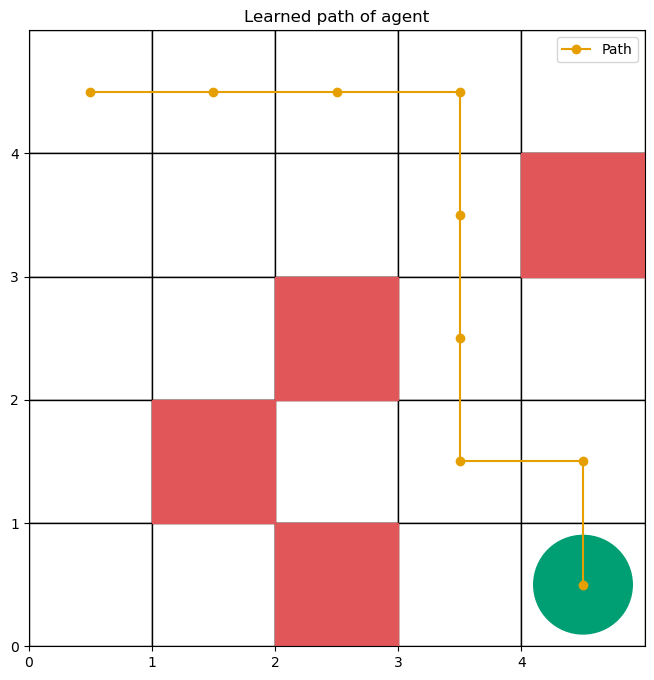

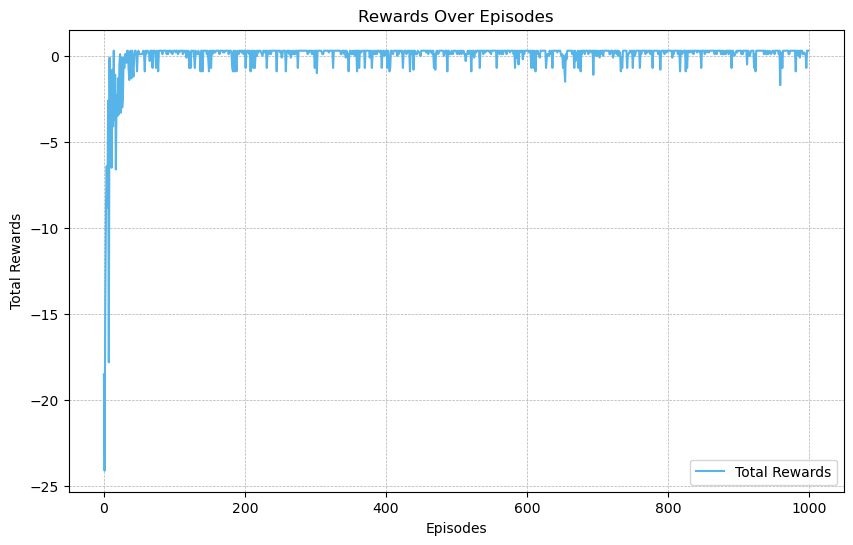

In [15]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Circle

def plot_environment(paths, grid_size, pits, goal):
    fig, ax = plt.subplots(figsize=(8, 8))

    # Draw grid
    for x in range(grid_size):
        for y in range(grid_size):
            ax.add_patch(Rectangle((y, grid_size - x - 1), 1, 1, edgecolor='black', facecolor='white'))

    # Draw pits
    for pit in pits:
        ax.add_patch(Rectangle((pit[1], grid_size - pit[0] - 1), 1, 1, color='#E15759'))

    # Draw goal
    ax.add_patch(Circle((goal[1] + 0.5, grid_size - goal[0] - 0.5), 0.4, color='#009E73'))

    # Draw paths
    for path in paths[-1:]:
        xs, ys = zip(*path)
        ys = [y + 0.5 for y in ys]
        xs = [grid_size - x - 0.5 for x in xs]
        ax.plot(ys, xs, marker='o', color='#E69F00', label='Path')

    plt.xlim(0, grid_size)
    plt.ylim(0, grid_size)
    plt.xticks(range(grid_size))
    plt.yticks(range(grid_size))
    plt.gca().set_aspect('equal', adjustable='box')
    plt.legend()
    plt.title('Learned path of agent')
    plt.show()


def plot_rewards(rewards):
    plt.figure(figsize=(10, 6))
    plt.plot(rewards, label='Total Rewards', color='#56B4E9')
    plt.title('Rewards Over Episodes')
    plt.xlabel('Episodes')
    plt.ylabel('Total Rewards')
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.legend()
    plt.show()

# Plot the results
plot_environment(paths, grid_size, pits, goal)
plot_rewards(rewards_per_episode)

### Now lets see how different learning rate and discount factor effects the algorithm and Visualise them

In [20]:

alphas = [0.1, 0.5, 0.9]  # Different learning rates
gammas = [0.5, 0.7, 0.9]  # Different discount factors

results_alpha = {}  # Rewards for different alphas
results_gamma = {}  # Rewards for different gammas

fixed_gamma = 0.9  # fixed gamma to analyse alpha
fixed_alpha = 0.1  # fixed alpha to analyse gamma

# Analyze different alpha values
for alpha in alphas:
    Q = {(x, y): {a: 0 for a in actions} for x in range(grid_size) for y in range(grid_size)}
    rewards_per_episode = []

    for episode in range(num_episodes):
        state = (0, 0)
        total_reward = 0
        action = random.choice(actions) if random.random() < epsilon else max(Q[state], key=Q[state].get)

        while state != goal:
            next_state, reward = take_action(state, action)
            next_action = random.choice(actions) if random.random() < epsilon else max(Q[next_state], key=Q[next_state].get)

            # Update Q-value
            Q[state][action] += alpha * (
                reward + fixed_gamma * Q[next_state][next_action] - Q[state][action]
            )

            state = next_state
            action = next_action
            total_reward += reward

        rewards_per_episode.append(total_reward)

    results_alpha[alpha] = rewards_per_episode

# Analyze different gamma values
for gamma in gammas:
    Q = {(x, y): {a: 0 for a in actions} for x in range(grid_size) for y in range(grid_size)}
    rewards_per_episode = []

    for episode in range(num_episodes):
        state = (0, 0)
        total_reward = 0
        action = random.choice(actions) if random.random() < epsilon else max(Q[state], key=Q[state].get)

        while state != goal:
            next_state, reward = take_action(state, action)
            next_action = random.choice(actions) if random.random() < epsilon else max(Q[next_state], key=Q[next_state].get)

            # Update Q-value
            Q[state][action] += fixed_alpha * (
                reward + gamma * Q[next_state][next_action] - Q[state][action]
            )

            state = next_state
            action = next_action
            total_reward += reward

        rewards_per_episode.append(total_reward)

    results_gamma[gamma] = rewards_per_episode

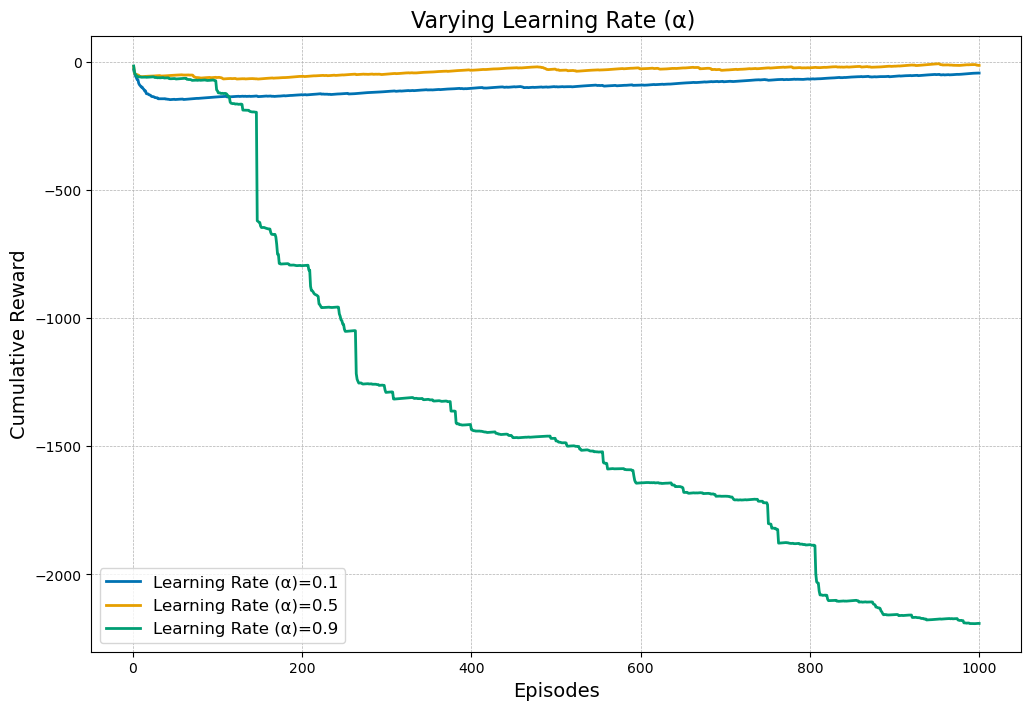

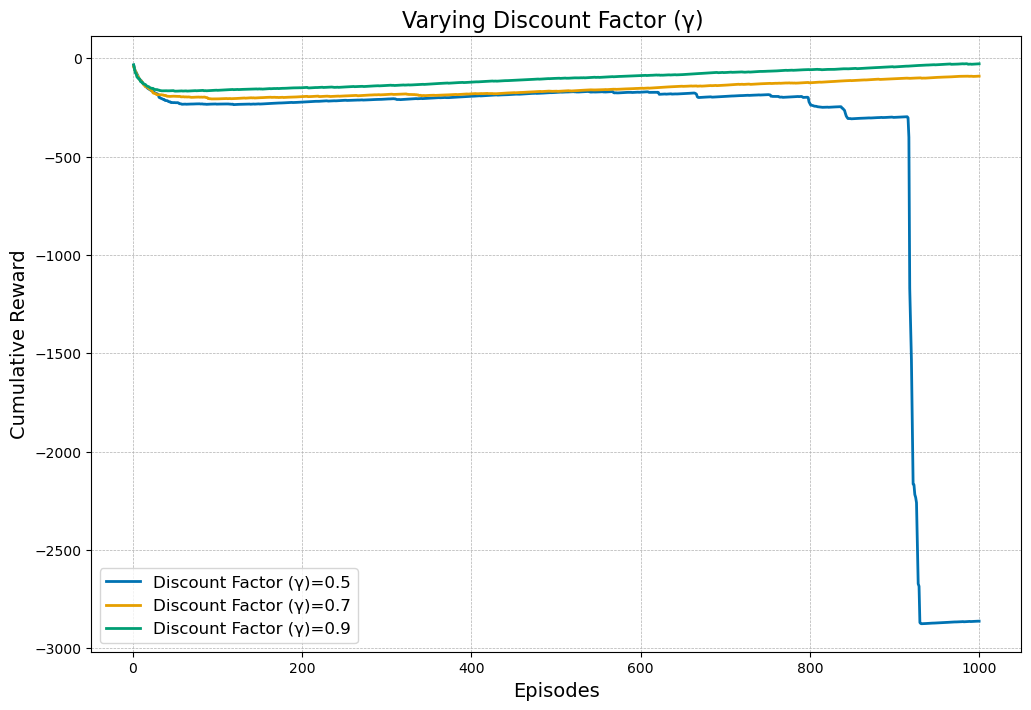

In [19]:
def plot_cumulative_rewards(results, param_values, param_name, colors):
    plt.figure(figsize=(12, 8))

    for value, color in zip(param_values, colors):
        rewards = np.cumsum(results[value])  # Calculate cumulative rewards
        plt.plot(range(1, len(rewards) + 1), rewards, label=f'{param_name}={value}', color=color, linewidth=2)

    plt.title(f'Varying {param_name} ', fontsize=16)
    plt.xlabel('Episodes', fontsize=14)
    plt.ylabel('Cumulative Reward', fontsize=14)
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.legend(fontsize=12)
    plt.show()

colors = ['#0072B2', '#E69F00', '#009E73', '#CC79A7', '#D55E00']

# Plot for learning rate (alpha)
plot_cumulative_rewards(results_alpha, alphas, 'Learning Rate (α)', colors)

# Plot for discount factor (gamma)
plot_cumulative_rewards(results_gamma, gammas, 'Discount Factor (γ)', colors)

#### *You can try implementing SARSA creating different enviroments and see how it works in different enviroments or use Available enviromnets like OpenAI Gym (https://gymnasium.farama.org/) to try out different things*
#### *There are many other factors which can effect SARSA. For example epsilon value, you can try implementing SARSA using different epsilon values and see how its effecting the agents learing and check the trade-offs between exploration and exploitation*
#### *You can also check how much computational time the algorithm takes over episodes with different changing values*

## References

#### https://www.youtube.com/watch?v=ZXEVznd5kaM
#### https://www.geeksforgeeks.org/sarsa-reinforcement-learning/
#### https://www.datacamp.com/tutorial/sarsa-reinforcement-learning-algorithm-in-python
#### https://github.com/ChristianOrr/reinforcement-learning-algorithms/blob/main/sarsa.ipynb